In [6]:
%matplotlib inline

In [77]:
import optoanalysis as oa
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

In [3]:
data = oa.load_data("testData.raw")

Loading data from testData.raw


In [8]:
data.get_fit_auto?

/home/ash/anaconda2/envs/python3/lib/python3.5/site-packages/optoanalysis-3.3.7-py3.5-linux-x86_64.egg/optoanalysis/optoanalysis.py:489: UserWarning: range is too small, returning NaN
  _warnings.warn("range is too small, returning NaN", UserWarning)


found best


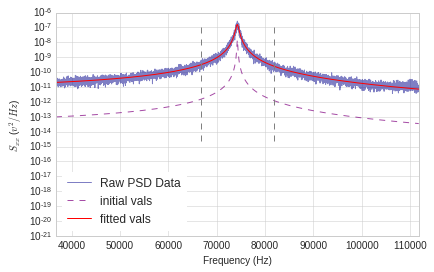



A: 548633139702.1037 +- 1.518617224721159% 
Trap Frequency: 466605.38925598894 +- 0.014086729888777386% 
Big Gamma: 3992.6414844211226 +- 3.2495973515732843% 


In [9]:
w0, A, G, _, _ = data.get_fit_auto(70e3)

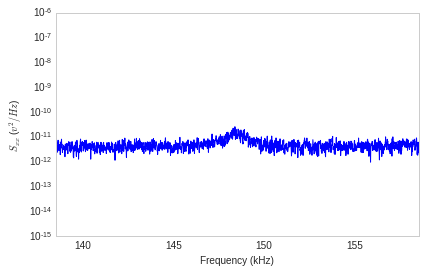

(<matplotlib.figure.Figure at 0x7fb859e074a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb859cda358>)

In [26]:
f = (w0.n/(2*np.pi))
f2 = 2*(w0.n/(2*np.pi))

data.plot_PSD([f2/1e3-10, f2/1e3+10])

found best


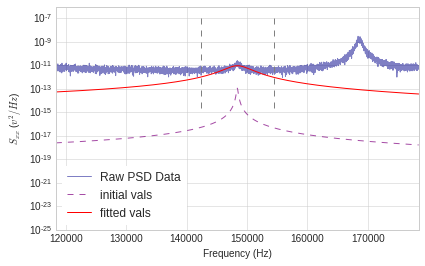



A: 5460591816.888507 +- 4.819416460051663% 
Trap Frequency: 932714.1179959807 +- 0.02874926630420712% 
Big Gamma: 25977.35485049896 +- 3.4989473662091903% 


In [27]:
w20, A2, G2, _, _ = data.get_fit_auto(f2)

In [43]:
z = oa.butterworth_filter(data.voltage[::2], data.SampleFreq/2, f-10e3, f+10e3)
z2 = oa.butterworth_filter(data.voltage[::2], data.SampleFreq/2, f2-10e3, f2+10e3)

In [44]:
print(len(data.time), len(z), len(z2))

5000002 2500001 2500001


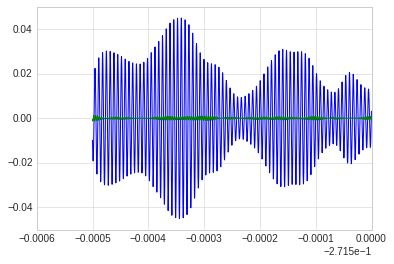

In [46]:
plt.plot(data.time.get_array()[0:5000], z[0:5000])
plt.plot(data.time.get_array()[0:5000], z2[0:5000])

In [55]:
s = 20*np.sin(np.arange(0, 100, 0.01))

In [56]:
np.sqrt(2*np.mean(s**2))

20.043360000950941

In [57]:
def MeanAmp(signal):
    return np.sqrt(2*np.mean(signal**2))

In [63]:
V1 = MeanAmp(z)

In [62]:
V2 = MeanAmp(z2)

In [102]:
r = V2/V1

In [103]:
beta = 4*r

In [104]:
k0 = (2*np.pi)/(1550e-9)

In [181]:
NA = 0.999
WaistSize = 1550e-9/(np.pi*NA)
Zr = np.pi*WaistSize**2/1550e-9

In [182]:
z0 = beta/(k0 - 1/Zr)

In [183]:
ConvFactor = V1/z0

In [184]:
ConvFactor

307063.15224001213

In [185]:
mFromA = 2*scipy.constants.Boltzmann*300/(np.pi*A) * ConvFactor**2 * G

In [186]:
mFromEquipartition = scipy.constants.Boltzmann*300/(w0**2 * z0**2)

In [187]:
mFromA

1.8093317114343098e-18+/-6.489949826955931e-20

In [188]:
mFromEquipartition

4.821247647238404e-18+/-1.3583122666710175e-21

In [189]:
def CalcR(Mass):
    density = 1800
    Radius = (3*Mass/(4*np.pi*density))**(1/3)
    return Radius

In [190]:
CalcR(mFromA)*1e9

62.14206680587009+/-0.7429978946825894

In [191]:
CalcR(mFromEquipartition)*1e9

86.15214769978056+/-0.008090680226565776

## Mass Distribution from Manafacturer Specs

In [192]:
0.05**0.5

0.22360679774997896

$(stdDev/mean)^2 <= 0.05$

$stdDev/mean <= 0.22$

$stdDev <= 0.22*mean$

In [206]:
0.05**2*50

0.12500000000000003